<a href="https://colab.research.google.com/github/Shashwat1001/Python/blob/master/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker 
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
import calmap

from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop, Adam

import warnings
warnings.filterwarnings('ignore')



In [0]:
df_india_test = pd.io.json.json_normalize(requests.get('https://api.rootnet.in/covid19-in/stats/testing/history').json()['data']).rename(columns = {"totalIndividualsTested":"c_individualtest","totalPositiveCases":"c_positive","totalSamplesTested":"c_tests"})

In [194]:
df_india_test.dtypes

day                         object
c_tests                    float64
c_individualtest           float64
c_positive                 float64
source                      object
p2t_ratio                  float64
positive                   float64
tests                      float64
dates               datetime64[ns]
dtype: object

In [0]:
df_india_test['dates'] = pd.to_datetime(df_india_test.dates)

In [0]:
df_india_test["p2t_ratio"]= np.round(100*df_india_test["c_positive"]/df_india_test["c_tests"],2)
df_india_test["positive"] = df_india_test["c_positive"].diff()
df_india_test["tests"] = df_india_test["c_tests"].diff()
df_india_test["p2t_ratio"]= np.round(100*df_india_test["positive"]/df_india_test["tests"],2)
df_india_test ['dates']= df_india_test['day']
df_india_test = df_india_test[1:]

In [200]:
df_india_test.head(5)

,day,c_tests,c_individualtest,c_positive,source,p2t_ratio,positive,tests,dates
2,2020-03-19,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf,3.05,32.0,1050.0,2020-03-19
3,2020-03-20,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf,4.39,54.0,1229.0,2020-03-20
4,2020-03-21,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf,5.24,79.0,1507.0,2020-03-21
5,2020-03-22,18127.0,17237.0,396.0,ICMR_website_update_22March_6PM_IST.pdf,6.66,81.0,1216.0,2020-03-22
6,2020-03-23,20707.0,19817.0,471.0,ICMR_website_update_23March_8PM_IST.pdf,2.91,75.0,2580.0,2020-03-23


In [202]:
df_india_test.shape

(60, 9)

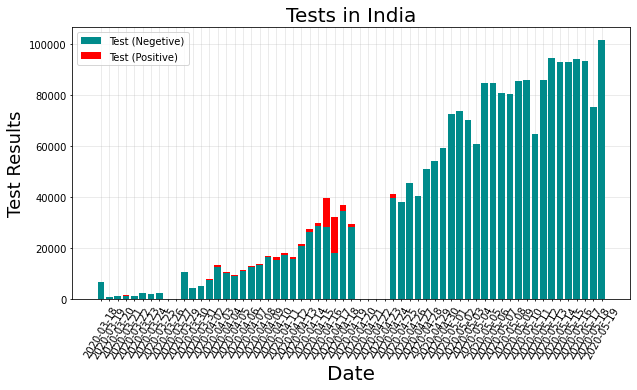

In [150]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.bar(df_india_test["day"],df_india_test["tests"].values[:],color="darkcyan",label="Test (Negetive)"+str())
plt.bar(df_india_test["day"],df_india_test["positive"].values[:],bottom=df_india_test["tests"].values[:]-df_india_test["positive"].values[:],color="Red",label="Test (Positive)")
plt.tick_params(size=2,labelsize = 10)
plt.tick_params(axis="x",size=2,labelsize = 10,labelrotation=60 )
plt.xlabel("Date",fontsize=20)
plt.ylabel("Test Results",fontsize=18)

plt.title("Tests in India",fontsize=20)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig('Test_India.png')

In [151]:
df_india_test["c_tests"][-1:].values[0]

2404267.0

In [152]:
np.round(1000000*df_india_test["c_tests"][-1:].values[0]/1300000000,2)

1849.44

In [0]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")


In [177]:
df_india.head(5)

,confirmed,recovered,deaths,active,Mortality Rate (per 100)
state,,,,,
Maharashtra,35058,8437,1249,25372,3.56
Tamil Nadu,11760,4406,82,7272,0.70
Gujarat,11746,4804,694,6248,5.91
Delhi,10554,4750,166,5638,1.57
Rajasthan,5757,3232,139,2386,2.41


In [155]:
total = df_india.sum()
total.name = "Total"
df_t = pd.DataFrame(total,dtype=float).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["deaths"]/df_t["confirmed"],2)
df_t.style.background_gradient(cmap='Purples',axis=1)

,confirmed,recovered,deaths,active,Mortality Rate (per 100)
Total,102231.000000,39658.000000,3169.000000,59398.000000,3.100000


In [156]:
df_india["Mortality Rate (per 100)"]= np.round(np.nan_to_num(100*df_india["deaths"]/df_india["confirmed"]),2)
df_india.style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Purples',subset=["active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}",subset=["Mortality Rate (per 100)"])

,confirmed,recovered,deaths,active,Mortality Rate (per 100)
state,,,,,
Maharashtra,35058,8437,1249,25372,3.56
Tamil Nadu,11760,4406,82,7272,0.70
Gujarat,11746,4804,694,6248,5.91
Delhi,10554,4750,166,5638,1.57
Rajasthan,5757,3232,139,2386,2.41
Madhya Pradesh,5236,2435,252,2549,4.81
Uttar Pradesh,4605,2783,118,1704,2.56
West Bengal,2825,1006,244,1575,8.64
Andhra Pradesh,2489,1621,52,816,2.09


In [157]:
df_india[df_india['deaths'] > 0].style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Purples',subset=["active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}",subset=["Mortality Rate (per 100)"])

,confirmed,recovered,deaths,active,Mortality Rate (per 100)
state,,,,,
Maharashtra,35058,8437,1249,25372,3.56
Tamil Nadu,11760,4406,82,7272,0.70
Gujarat,11746,4804,694,6248,5.91
Delhi,10554,4750,166,5638,1.57
Rajasthan,5757,3232,139,2386,2.41
Madhya Pradesh,5236,2435,252,2549,4.81
Uttar Pradesh,4605,2783,118,1704,2.56
West Bengal,2825,1006,244,1575,8.64
Andhra Pradesh,2489,1621,52,816,2.09


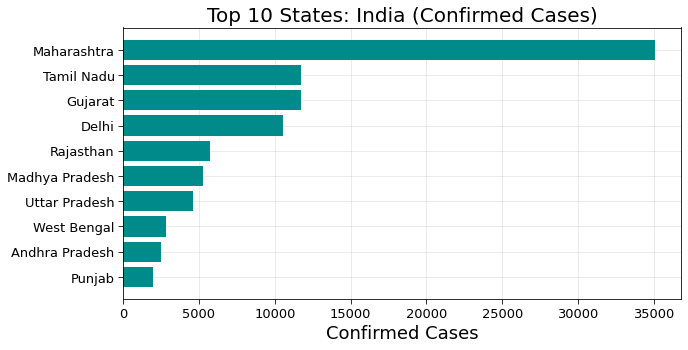

In [158]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('confirmed')["confirmed"].index[-10:],df_india.sort_values('confirmed')["confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: India (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 States_India (Confirmed Cases).png')


In [159]:
df_india.corr().style.background_gradient(cmap='Reds').format("{:.2f}")

,confirmed,recovered,deaths,active,Mortality Rate (per 100)
confirmed,1.00,0.94,0.93,0.99,0.30
recovered,0.94,1.00,0.85,0.89,0.35
deaths,0.93,0.85,1.00,0.92,0.44
active,0.99,0.89,0.92,1.00,0.26
Mortality Rate (per 100),0.30,0.35,0.44,0.26,1.00
